In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [212]:
dataset = pd.read_csv('/home/accubits/Desktop/data_for_p1.csv', header=None)
dataset.columns =['count','date']
dataset['date'] = dataset['date'].astype('datetime64[ns]')
dataset['date'] = dataset['date'].apply(lambda dt: dt.replace(day=1))
dataset = dataset.groupby(['date']).sum()
indexDataset = dataset[120:-10]
dataset.head()

,count
date,
1996-01-01,276
1996-02-01,141
1996-03-01,237
1996-04-01,148
1996-05-01,209


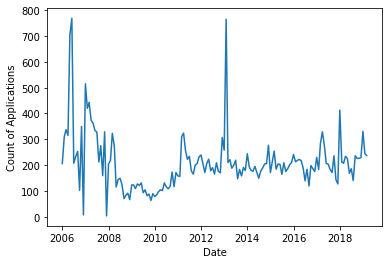

In [213]:
plt.xlabel("Date")
plt.ylabel("Count of Applications")
plt.plot(indexDataset)

In [214]:
rolmean = indexDataset.rolling(window=12).mean()
rolstd = indexDataset.rolling(window=12).std()
print(rolmean, rolstd)

                 count
date                  
2006-01-01         NaN
2006-02-01         NaN
2006-03-01         NaN
2006-04-01         NaN
2006-05-01         NaN
2006-06-01         NaN
2006-07-01         NaN
2006-08-01         NaN
2006-09-01         NaN
2006-10-01         NaN
2006-11-01         NaN
2006-12-01  316.166667
2007-01-01  341.916667
2007-02-01  351.083333
2007-03-01  359.916667
2007-04-01  364.833333
2007-05-01  336.333333
2007-06-01  300.083333
2007-07-01  310.166667
2007-08-01  308.416667
2007-09-01  310.250000
2007-10-01  315.000000
2007-11-01  313.250000
2007-12-01  312.916667
2008-01-01  287.000000
2008-02-01  270.166667
2008-03-01  260.166667
2008-04-01  251.916667
2008-05-01  231.250000
2008-06-01  215.416667
...                ...
2016-10-01  195.916667
2016-11-01  194.666667
2016-12-01  191.750000
2017-01-01  190.833333
2017-02-01  188.333333
2017-03-01  193.833333
2017-04-01  202.750000
2017-05-01  207.833333
2017-06-01  209.250000
2017-07-01  214.666667
2017-08-01 

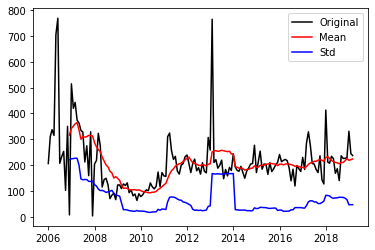

In [215]:
orig = plt.plot(indexDataset, color='black', label='Original')
mean = plt.plot(rolmean, color='red', label='Mean')
std = plt.plot(rolstd, color='blue', label='Std')
plt.legend(loc='best')
plt.title = ("Rolling mean and STD")
plt.show(block=False)

In [216]:
from statsmodels.tsa.stattools import adfuller

print("Results of Dicky-Fuller Test:")
dftest = adfuller(indexDataset['count'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s' %key] = value
    
print(dfoutput)

Results of Dicky-Fuller Test:
Test Statistic                  -5.075430
p-value                          0.000016
#Lags Used                       1.000000
Number of Observations Used    157.000000
Critical Value(1%               -3.472703
Critical Value(5%               -2.880132
Critical Value(10%              -2.576683
dtype: float64


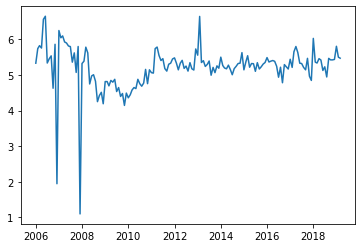

In [217]:
indexDatasetLogScale = np.log(indexDataset)
plt.plot(indexDatasetLogScale)

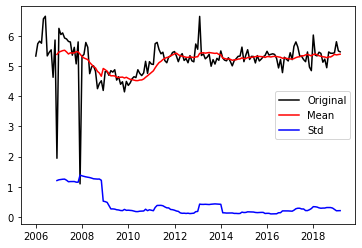

Results of Dicky-Fuller Test:
Test Statistic                  -1.685724
p-value                          0.438482
#Lags Used                      13.000000
Number of Observations Used    145.000000
Critical Value(1%               -3.476273
Critical Value(5%               -2.881688
Critical Value(10%              -2.577513
dtype: float64


In [218]:
movingAVG = indexDatasetLogScale.rolling(window=12).mean()
movingSTD = indexDatasetLogScale.rolling(window=12).std()
orig = plt.plot(indexDatasetLogScale , color='black', label='Original')
mean = plt.plot(movingAVG, color='red', label='Mean')
std = plt.plot(movingSTD, color='blue', label='Std')
plt.legend(loc='best')
plt.title = ("Rolling mean and STD")
plt.show(block=False)

from statsmodels.tsa.stattools import adfuller

print("Results of Dicky-Fuller Test:")
dftest = adfuller(indexDatasetLogScale['count'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s' %key] = value
    
print(dfoutput)

In [219]:
indexDatasetLogScaleMinusMA = indexDatasetLogScale - movingAVG
indexDatasetLogScaleMinusMA.dropna(inplace = True)
indexDatasetLogScaleMinusMA.head()


,count
date,
2006-12-01,-3.436286
2007-01-01,0.785613
2007-02-01,0.556394
2007-03-01,0.586918
2007-04-01,0.403298


In [220]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(time_series):
    movingAVG = time_series.rolling(window=12).mean()
    movingSTD = time_series.rolling(window=12).std()
    orig = plt.plot(time_series , color='black', label='Original')
    mean = plt.plot(movingAVG, color='red', label='Mean')
    std = plt.plot(movingSTD, color='blue', label='Std')
    plt.legend(loc='best')
    plt.title = ("Rolling mean and STD")
    plt.show(block=False)
    
    
    print("Results of Dicky-Fuller Test:")
    dftest = adfuller(time_series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s' %key] = value
    print(dfoutput)

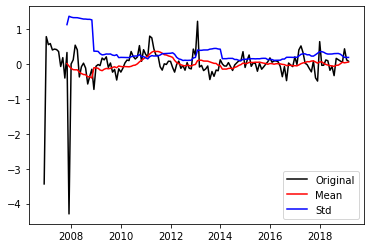

Results of Dicky-Fuller Test:
Test Statistic                  -1.977594
p-value                          0.296483
#Lags Used                      11.000000
Number of Observations Used    136.000000
Critical Value(1%               -3.479372
Critical Value(5%               -2.883037
Critical Value(10%              -2.578234
dtype: float64


In [221]:
test_stationarity(indexDatasetLogScaleMinusMA)

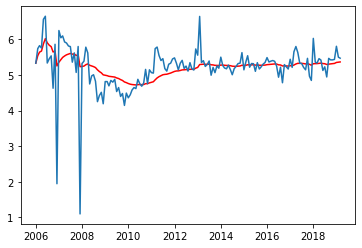

In [222]:
exponentialWeightedAVG = indexDatasetLogScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(exponentialWeightedAVG,  color='red')
plt.plot(indexDatasetLogScale)

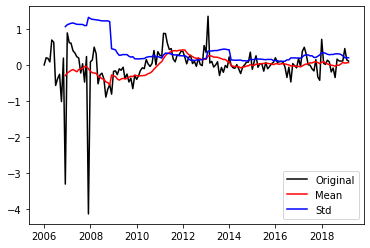

Results of Dicky-Fuller Test:
Test Statistic                  -1.694265
p-value                          0.434070
#Lags Used                      12.000000
Number of Observations Used    146.000000
Critical Value(1%               -3.475953
Critical Value(5%               -2.881548
Critical Value(10%              -2.577439
dtype: float64


In [223]:
indexDatasetLogScaleMinusMovingEWA = indexDatasetLogScale - exponentialWeightedAVG
test_stationarity(indexDatasetLogScaleMinusMovingEWA)

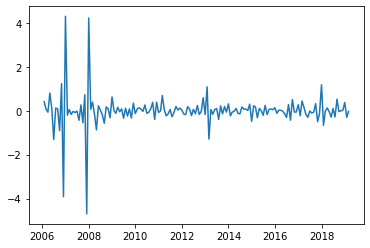

In [224]:
indexDatasetLogScaleShift = indexDatasetLogScale - indexDatasetLogScale.shift()
plt.plot(indexDatasetLogScaleShift)

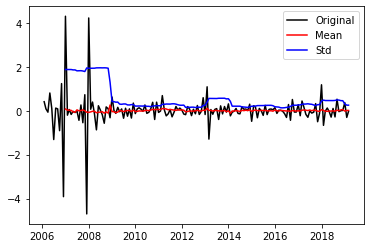

Results of Dicky-Fuller Test:
Test Statistic                  -4.789224
p-value                          0.000057
#Lags Used                      12.000000
Number of Observations Used    145.000000
Critical Value(1%               -3.476273
Critical Value(5%               -2.881688
Critical Value(10%              -2.577513
dtype: float64


In [225]:
indexDatasetLogScaleShift.dropna(inplace=True)
test_stationarity(indexDatasetLogScaleShift)

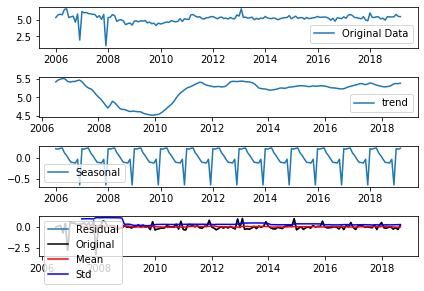

Results of Dicky-Fuller Test:
Test Statistic                -5.694255e+00
p-value                        7.940992e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.350000e+02
Critical Value(1%             -3.479743e+00
Critical Value(5%             -2.883198e+00
Critical Value(10%            -2.578320e+00
dtype: float64


In [226]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexDatasetLogScale)

trend =  decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexDatasetLogScale, label='Original Data')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

/home/accubits/.local/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


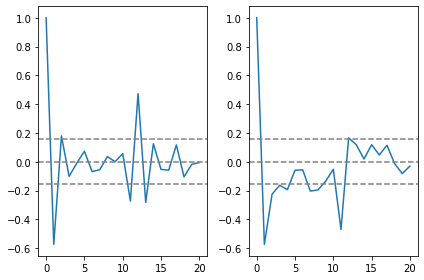

In [227]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexDatasetLogScaleShift, nlags = 20)
lag_pacf = pacf(indexDatasetLogScaleShift, nlags=20, method='ols')

#plot_ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexDatasetLogScaleShift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexDatasetLogScaleShift)), linestyle='--', color='gray')
# plt.title('AutoCorrelation Function')

#plot_PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexDatasetLogScaleShift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexDatasetLogScaleShift)), linestyle='--', color='gray')
# plt.title('PartialAutoCorrelation Function')
plt.tight_layout()

/home/accubits/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/accubits/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/accubits/.local/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


RSS: 43.9142
plotting ARIMA model


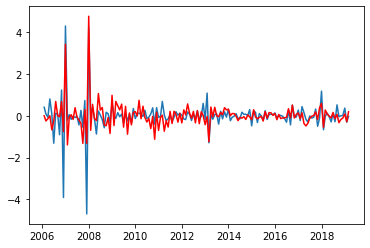

In [228]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexDatasetLogScale, order=(9,1,4))
results_ARIMA = model.fit(disp=-1)
plt.plot(indexDatasetLogScaleShift)
plt.plot(results_ARIMA.fittedvalues, color='red')
print('RSS: %.4f' %sum((results_ARIMA.fittedvalues-indexDatasetLogScaleShift['count'])**2))
print("plotting ARIMA model")

In [229]:
predictions_arima_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_arima_diff)

date
2006-02-01   -0.000978
2006-03-01   -0.248351
2006-04-01   -0.136207
2006-05-01    0.004018
2006-06-01   -0.673197
2006-07-01   -0.274122
2006-08-01    0.685540
2006-09-01    0.006189
2006-10-01   -0.041606
2006-11-01    0.678140
2006-12-01   -0.757838
2007-01-01    3.427187
2007-02-01   -1.393452
2007-03-01   -0.077440
2007-04-01    0.050876
2007-05-01   -0.171541
2007-06-01    0.387463
2007-07-01   -0.063541
2007-08-01   -0.204069
2007-09-01   -0.357304
2007-10-01   -1.319353
2007-11-01    0.291429
2007-12-01   -1.321746
2008-01-01    4.765519
2008-02-01   -0.694910
2008-03-01    0.548410
2008-04-01   -0.141653
2008-05-01   -0.224728
2008-06-01    1.064496
2008-07-01    0.274974
                ...   
2016-10-01    0.513657
2016-11-01   -0.106074
2016-12-01    0.065675
2017-01-01    0.136138
2017-02-01   -0.133818
2017-03-01    0.143428
2017-04-01   -0.371295
2017-05-01   -0.485476
2017-06-01   -0.360767
2017-07-01   -0.122298
2017-08-01   -0.019235
2017-09-01    0.013916
2017-1

In [230]:
predictions_arima_diffCumSum = predictions_arima_diff.cumsum()
print(predictions_arima_diffCumSum.head())

date
2006-02-01   -0.000978
2006-03-01   -0.249329
2006-04-01   -0.385536
2006-05-01   -0.381518
2006-06-01   -1.054715
dtype: float64


In [231]:
predictions_arima_log = pd.Series(indexDatasetLogScale['count'].ix[0], index=indexDatasetLogScale.index)
predictions_arima_log = predictions_arima_log.add(predictions_arima_diffCumSum, fill_value=0)
predictions_arima_log.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2006-01-01    5.327876
2006-02-01    5.326898
2006-03-01    5.078547
2006-04-01    4.942340
2006-05-01    4.946358
dtype: float64

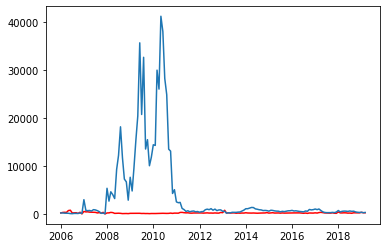

In [232]:
predictions_arima = np.exp(predictions_arima_log)
plt.plot(indexDataset, color='red')
plt.plot(predictions_arima)

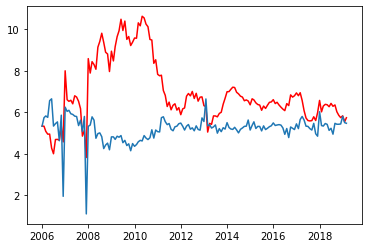

In [233]:
plt.plot(predictions_arima_log, color='red')
plt.plot(indexDatasetLogScale)

In [234]:
indexDataset.size


159

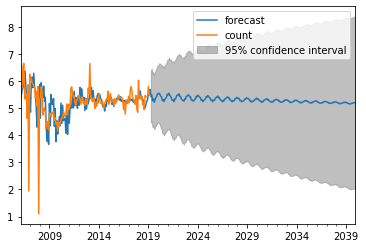

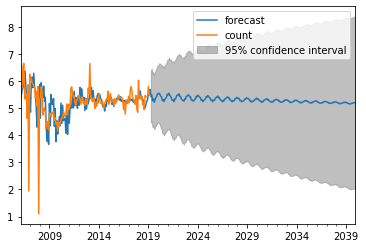

In [235]:
results_ARIMA.plot_predict(1,407)

In [236]:
x = results_ARIMA.forecast(steps=10)[0]
x

array([5.42423267, 5.48442239, 5.27208198, 5.34887455, 5.21515451,
       5.29999576, 5.38238874, 5.42784088, 5.52521707, 5.5123502 ])

In [237]:
np.exp(x[1])

240.9097518523215

In [238]:
dataset[:-10].size


279

In [239]:
test_values = dataset.values

In [240]:
test_values[280:286]

array([[198],
       [181],
       [260],
       [204],
       [289],
       [285]])

In [241]:
for i in range(1,7):
    print(np.exp(x[i]))

240.9097518523215
194.82115505179868
210.37140132666514
184.04025429321786
200.33596056168633
217.54130408506938


In [242]:
results_ARIMA.aic

264.13437211121595

In [243]:
from sklearn.metrics import mean_squared_error

test = []
pred = []
for i in range(1,7):
    pred.append(np.exp(x[i]))
    test.append(test_values[279+i])
    

In [244]:
mean_squared_error(pred,test)

2884.2746550023217

In [245]:
pred

[240.9097518523215,
 194.82115505179868,
 210.37140132666514,
 184.04025429321786,
 200.33596056168633,
 217.54130408506938]

In [246]:
results_ARIMA.save('model_1.pkl')

In [247]:
from statsmodels.tsa.arima_model import ARIMAResults
loaded = ARIMAResults.load('model_1.pkl')

In [250]:
np.exp(loaded.forecast(steps=10)[0])

array([226.83722099, 240.90975185, 194.82115505, 210.37140133,
       184.04025429, 200.33596056, 217.54130409, 227.65717433,
       250.9408037 , 247.73266432])

In [251]:
dataset[-10:]

,count
date,
2019-04-01,269
2019-05-01,198
2019-06-01,181
2019-07-01,260
2019-08-01,204
2019-09-01,289
2019-10-01,285
2019-11-01,266
2019-12-01,75
